<a href="https://colab.research.google.com/github/DataEtnos/estudos_python/blob/main/regress%C3%B5es_linear_com_SKLEARN_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.preprocessing import MinMaxScaler
import statsmodels.formula.api as smf



In [ ]:
df = pd.read_excel("/content/imoveis.xlsx")
df.head()

,area,preco
0,359.87,25000
1,353.12,45000
2,341.89,45000
3,435.99,20000
4,341.77,25000


In [ ]:
df.describe()

,area,preco
count,54.000000,54.000000
mean,457.483519,41296.296296
std,261.527053,16488.566227
min,293.220000,20000.000000
25%,355.087500,30000.000000
50%,380.360000,40000.000000
75%,470.087500,50000.000000
max,2057.570000,120000.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   area    54 non-null     float64
 1   preco   54 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 992.0 bytes


<Axes: xlabel='area', ylabel='Count'>

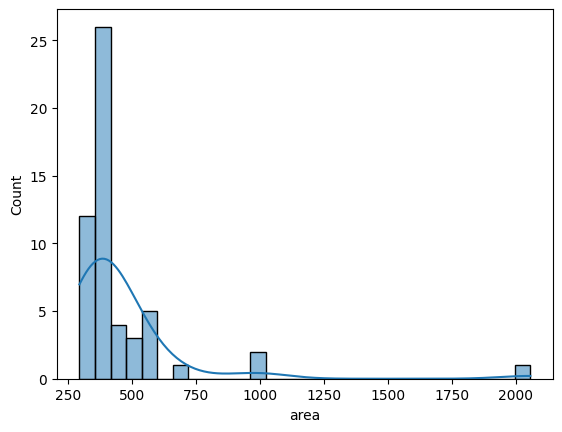

In [ ]:
sns.histplot(df,x = "area",kde=True)

<Axes: xlabel='preco', ylabel='Count'>

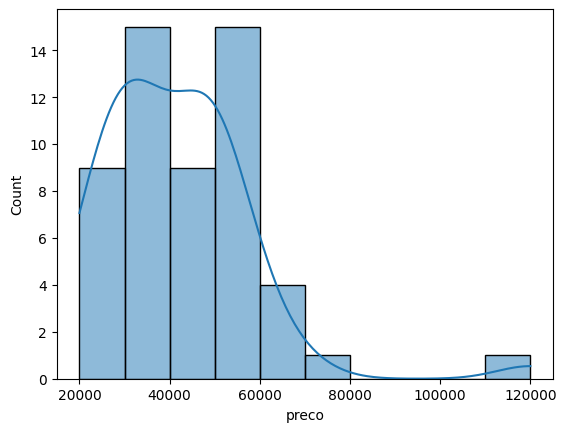

In [ ]:
sns.histplot(df,x = "preco ",kde=True)

In [ ]:
df.corr()

,area,preco
area,1.000000,0.511373
preco,0.511373,1.000000


<Axes: xlabel='area', ylabel='preco'>

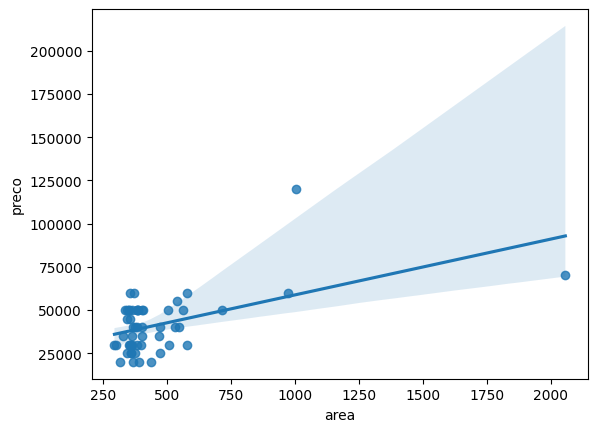

In [ ]:
sns.regplot(x= "area",y= "preco", data =  df)

#Aqui foi feito as analises exploratoria e descritiva dos dados .


1. Portanto  vou aplicar tecnicas de normalização de dados com sklearn .

2. min max scaler

In [ ]:
scaler = MinMaxScaler()
df_norm=pd.DataFrame(scaler.fit_transform(df),index = df.index , columns = df.columns)
df_norm.head()


,area,preco
0,0.037776,0.05
1,0.033950,0.25
2,0.027585,0.25
3,0.080919,0.00
4,0.027517,0.05


<Axes: xlabel='area', ylabel='preco'>

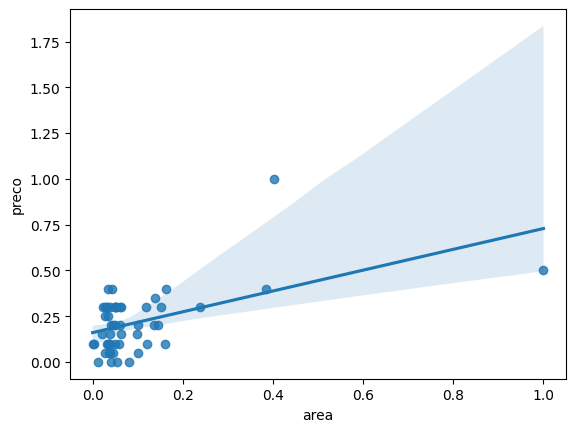

In [ ]:
sns.regplot(x= "area",y= "preco", data =  df_norm)

In [ ]:
df_norm.describe()


,area,preco
count,54.000000,54.000000
mean,0.093101,0.212963
std,0.148229,0.164886
min,0.000000,0.000000
25%,0.035065,0.100000
50%,0.049389,0.200000
75%,0.100245,0.300000
max,1.000000,1.000000


In [ ]:
function = "preco ~ area"
model = smf.ols(formula = function,data = df_norm).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  preco   R-squared:                       0.262
Model:                            OLS   Adj. R-squared:                  0.247
Method:                 Least Squares   F-statistic:                     18.41
Date:                Mon, 10 Jun 2024   Prob (F-statistic):           7.76e-05
Time:                        23:37:48   Log-Likelihood:                 29.402
No. Observations:                  54   AIC:                            -54.80
Df Residuals:                      52   BIC:                            -50.83
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.1600      0.023      6.942      0.0

##Apesar do R2 ser de  0,26 e o R2 ajustado ser de 0,24. os valores p ser de 0 o que é bem baixo

##vamos continuar com o treino de correlação liner, este modelo é apenas para teste praticos. as metricas pela OLS Não são exatamente boa .


#entretanto a tecnica de esta correta .

In [ ]:
x = df_norm["area"]
y = df_norm["preco"]

In [ ]:
x_treino,x_teste,y_treino,y_teste = train_test_split(x,y,test_size = 0.20,random_state = 42)
lr = LinearRegression()
lr.fit(x_treino.values.reshape(-1,1),y_treino)
LinearRegression()

LinearRegression()

In [ ]:
r_sq = lr.score(x_treino.values.reshape(-1,1),y_treino)
print(r_sq)

0.2754399686961232


In [ ]:
y_pred_treino = lr.predict(x_treino.values.reshape(-1,1))
print("MAE:",metrics.mean_absolute_error(y_treino,y_pred_treino))
print("MSE:",metrics.mean_squared_error(y_treino,y_pred_treino))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_treino,y_pred_treino)))

MAE: 0.1068423059800295
MSE: 0.019987119738590717
RMSE: 0.1413758103021543


In [ ]:
lr.fit(x_teste.values.reshape(-1,1),y_teste)

LinearRegression()

In [ ]:
lr_pred_teste = lr.predict(x_teste.values.reshape(-1,1))
print("MAE:",metrics.mean_absolute_error(y_teste,lr_pred_teste))
print("MSE:",metrics.mean_squared_error(y_teste,lr_pred_teste))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_teste,lr_pred_teste)))

MAE: 0.10852020952335328
MSE: 0.01746864564020875
RMSE: 0.13216900408268478
